### Introduction

Sentiment analysis is part of the Natural Language Processing (NLP) techniques that consists in extracting emotions related to some raw texts.The goal of this study is to show how sentiment analysis can be performed using python.


The main libraries we will use: NLTK Gensim Scikit-learn



We will use here some hotel reviews data. Each observation consists in one customer review for one hotel. Each customer review is composed of a textual feedback of the customer’s experience at the hotel and an overall rating.

For each textual review, we want to predict if it corresponds to a good review (the customer is happy) or to a bad one (the customer is not satisfied). The reviews overall ratings can range from 2.5/10 to 10/10. In order to simplify the problem we will split those into two categories:

bad reviews have overall ratings < 5 good reviews have overall ratings >= 5 The challenge here is to be able to predict this information using only the raw textual data from the review.

### Load data

We first start by loading the raw data. Each textual reviews is splitted into a positive part and a negative part. We group them together in order to start with only raw text data and no other information.

In [2]:
import pandas as pd

# read data
reviews_df = pd.read_csv("review_hotel.csv")

In [3]:
reviews_df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,08-03-2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,08-03-2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,NaN,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,10-04-2016,7.7,Hotel Arena,United Kingdom,The work being done externally right now is o...,27,1403,Great room very comfortable bed Nice and quie...,97,1,9.6,"[' Leisure trip ', ' Couple ', ' Duplex Double...",303 day,52.360576,4.915968
96,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,9/27/2016,7.7,Hotel Arena,United Kingdom,No Negative,0,1403,We upgraded to a larger room Had the bath inf...,38,1,10.0,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",310 day,52.360576,4.915968
97,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,9/27/2016,7.7,Hotel Arena,United Kingdom,Our room was a little compact probably due to...,31,1403,A very quirky hotel that managed to keep its ...,29,2,8.8,"[' Leisure trip ', ' Couple ', ' Duplex Double...",310 day,52.360576,4.915968
98,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,9/19/2016,7.7,Hotel Arena,United Kingdom,Got charged 50 for a birthday package when it...,112,1403,No Positive,0,1,5.0,"[' Leisure trip ', ' Couple ', ' Large King Ro...",318 day,52.360576,4.915968


In [4]:
# append the positive and negative text reviews
reviews_df["review"] = reviews_df["Negative_Review"] + reviews_df["Positive_Review"]

In [5]:
reviews_df["review"]

,review
0,I am so angry that i made this post available...
1,No Negative No real complaints the hotel was g...
2,Rooms are nice but for elderly a bit difficul...
3,My room was dirty and I was afraid to walk ba...
4,You When I booked with your company on line y...
...,...
95,The work being done externally right now is o...
96,No Negative We upgraded to a larger room Had t...
97,Our room was a little compact probably due to...
98,Got charged 50 for a birthday package when it...


In [6]:
#  create the label
reviews_df["is_bad_review"] = reviews_df["Reviewer_Score"].apply(lambda x: 1 if x < 5 else 0)

In [7]:
reviews_df["is_bad_review"]

,is_bad_review
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,0
98,0


In [8]:
#Select only relevant columns
reviews_df = reviews_df[["review", "is_bad_review"]]
reviews_df

,review,is_bad_review
0,I am so angry that i made this post available...,1
1,No Negative No real complaints the hotel was g...,0
2,Rooms are nice but for elderly a bit difficul...,0
3,My room was dirty and I was afraid to walk ba...,1
4,You When I booked with your company on line y...,0
...,...,...
95,The work being done externally right now is o...,0
96,No Negative We upgraded to a larger room Had t...,0
97,Our room was a little compact probably due to...,0
98,Got charged 50 for a birthday package when it...,0


In [9]:
reviews_df.to_csv('abc.csv')

## Data cleaning

If the user doesn’t leave any negative feedback comment, this will appear as “No Negative” in our data. This is the same for the positive comments with the default value “No Positive”. We have to remove those parts from our texts.

In [10]:
# remove 'No Negative' or 'No Positive' from text
reviews_df["review"] = reviews_df["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

/tmp/ipython-input-2009822690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df["review"] = reviews_df["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))


The next step consists in cleaning the text data with various

*   List item
*   List item



1.   List item
2.   List item

operations:

In [11]:
reviews_df["review"]

,review
0,I am so angry that i made this post available...
1,No real complaints the hotel was great great ...
2,Rooms are nice but for elderly a bit difficul...
3,My room was dirty and I was afraid to walk ba...
4,You When I booked with your company on line y...
...,...
95,The work being done externally right now is o...
96,We upgraded to a larger room Had the bath inf...
97,Our room was a little compact probably due to...
98,Got charged 50 for a birthday package when it...


In [12]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [13]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet
import nltk




def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews_df["review_clean"] = reviews_df["review"].apply(lambda x: clean_text(x))
reviews_df

/tmp/ipython-input-304038303.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df["review_clean"] = reviews_df["review"].apply(lambda x: clean_text(x))


,review,is_bad_review,review_clean
0,I am so angry that i made this post available...,1,angry make post available via possible site us...
1,No real complaints the hotel was great great ...,0,real complaint hotel great great location surr...
2,Rooms are nice but for elderly a bit difficul...,0,room nice elderly bit difficult room two story...
3,My room was dirty and I was afraid to walk ba...,1,room dirty afraid walk barefoot floor look cle...
4,You When I booked with your company on line y...,0,book company line show picture room think get ...
...,...,...,...
95,The work being done externally right now is o...,0,work do externally right put arrival look grea...
96,We upgraded to a larger room Had the bath inf...,0,upgraded large room bath infront bed allow rel...
97,Our room was a little compact probably due to...,0,room little compact probably due loft room end...
98,Got charged 50 for a birthday package when it...,0,get charge birthday package advertise website ...


In [14]:
# tokenize text and remove puncutation
import string
text = "If the user34 doesn’t left123 any & negative went feedback# comment,123 this will% appear goes as “No Negative” in our data."
text = [word.strip(string.punctuation) for word in text.split(" ")]
print(text)

['If', 'the', 'user34', 'doesn’t', 'left123', 'any', '', 'negative', 'went', 'feedback', 'comment,123', 'this', 'will', 'appear', 'goes', 'as', '“No', 'Negative”', 'in', 'our', 'data']


In [15]:
# remove words that contain numbers
text = [word for word in text if not any(c.isdigit() for c in word)]
print(text)

['If', 'the', 'doesn’t', 'any', '', 'negative', 'went', 'feedback', 'this', 'will', 'appear', 'goes', 'as', '“No', 'Negative”', 'in', 'our', 'data']


In [16]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
pos_tags = pos_tag(text)
print(pos_tags)
# # lemmatize text
text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
print(text)

[('If', 'IN'), ('the', 'DT'), ('doesn’t', 'NN'), ('any', 'DT'), ('', 'NNP'), ('negative', 'JJ'), ('went', 'VBD'), ('feedback', 'NN'), ('this', 'DT'), ('will', 'MD'), ('appear', 'VB'), ('goes', 'VBZ'), ('as', 'IN'), ('“No', 'JJ'), ('Negative”', 'NNP'), ('in', 'IN'), ('our', 'PRP$'), ('data', 'NNS')]
['If', 'the', 'doesn’t', 'any', '', 'negative', 'go', 'feedback', 'this', 'will', 'appear', 'go', 'a', '“No', 'Negative”', 'in', 'our', 'data']


In [17]:
reviews_df.head()

,review,is_bad_review,review_clean
0,I am so angry that i made this post available...,1,angry make post available via possible site us...
1,No real complaints the hotel was great great ...,0,real complaint hotel great great location surr...
2,Rooms are nice but for elderly a bit difficul...,0,room nice elderly bit difficult room two story...
3,My room was dirty and I was afraid to walk ba...,1,room dirty afraid walk barefoot floor look cle...
4,You When I booked with your company on line y...,0,book company line show picture room think get ...


In [18]:
reviews_df.to_csv('abc.csv')

To clean textual data, we call our custom ‘clean_text’ function that performs

1.   List item
2.   List item

several transformations:

>lower the text
>tokenize the text (split the text into words) and remove the punctuation
>remove useless words that contain numbers
> remove useless stop words like ‘the’, ‘a’ ,’this’ etc.
>Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database
> lemmatize the text: transform every word into their root form (e.g. rooms -> room, slept -> sleep)

### Feature engineering

In [19]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["review_clean"].apply(lambda x: sid.polarity_scores(x))
reviews_df
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/tmp/ipython-input-1726547706.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df["sentiments"] = reviews_df["review_clean"].apply(lambda x: sid.polarity_scores(x))


In [20]:
sid.polarity_scores('good')

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}

In [21]:
sid.polarity_scores('bad')

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5423}

In [22]:
sid.polarity_scores('bad or good')

{'neg': 0.473, 'neu': 0.135, 'pos': 0.392, 'compound': -0.1531}

In [23]:
sid.polarity_scores('possible')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [24]:
reviews_df.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound
0,I am so angry that i made this post available...,1,angry make post available via possible site us...,0.114,0.780,0.105,0.0609
1,No real complaints the hotel was great great ...,0,real complaint hotel great great location surr...,0.098,0.617,0.285,0.9565
2,Rooms are nice but for elderly a bit difficul...,0,room nice elderly bit difficult room two story...,0.098,0.591,0.311,0.8555
3,My room was dirty and I was afraid to walk ba...,1,room dirty afraid walk barefoot floor look cle...,0.200,0.575,0.225,0.6249
4,You When I booked with your company on line y...,0,book company line show picture room think get ...,0.082,0.708,0.210,0.9042



We first start by adding sentiment analysis features because we can guess that customers reviews are highly linked to how they felt about their stay at the hotel. We use Vader, which is a part of the NLTK module designed for sentiment analysis. Vader uses a lexicon of words to find which ones are positives or negatives. It also takes into account the context of the sentences to determine the sentiment scores. For each text, Vader returns 4 values:

1. a neutrality score
2. a positivity score
3. a negativity score
4. an overall score that summarizes the previous scores

We will integrate those 4 values as features in our dataset.

In [25]:
# add number of characters column
reviews_df["nb_chars"] = reviews_df["review_clean"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["review_clean"].apply(lambda x: len(x.split(" ")))

In [26]:
reviews_df.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words
0,I am so angry that i made this post available...,1,angry make post available via possible site us...,0.114,0.780,0.105,0.0609,1022,173
1,No real complaints the hotel was great great ...,0,real complaint hotel great great location surr...,0.098,0.617,0.285,0.9565,441,63
2,Rooms are nice but for elderly a bit difficul...,0,room nice elderly bit difficult room two story...,0.098,0.591,0.311,0.8555,191,33
3,My room was dirty and I was afraid to walk ba...,1,room dirty afraid walk barefoot floor look cle...,0.200,0.575,0.225,0.6249,779,119
4,You When I booked with your company on line y...,0,book company line show picture room think get ...,0.082,0.708,0.210,0.9042,410,60


In [26]:
#pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requi

In [27]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(reviews_df["review_clean"]).toarray()
# tfidf_result
# len(tfidf_result)
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names_out())
# tfidf_df
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)
reviews_df.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,word_also,...,word_take,word_time,word_tram,word_use,word_view,word_walk,word_well,word_window,word_work,word_would
0,I am so angry that i made this post available...,1,angry make post available via possible site us...,0.114,0.780,0.105,0.0609,1022,173,0.000000,...,0.0,0.164846,0.0,0.086692,0.089102,0.000000,0.000000,0.267306,0.0,0.071193
1,No real complaints the hotel was great great ...,0,real complaint hotel great great location surr...,0.098,0.617,0.285,0.9565,441,63,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.241485,0.000000,0.0,0.218383
2,Rooms are nice but for elderly a bit difficul...,0,room nice elderly bit difficult room two story...,0.098,0.591,0.311,0.8555,191,33,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,My room was dirty and I was afraid to walk ba...,1,room dirty afraid walk barefoot floor look cle...,0.200,0.575,0.225,0.6249,779,119,0.363212,...,0.0,0.000000,0.0,0.000000,0.000000,0.121071,0.000000,0.000000,0.0,0.000000
4,You When I booked with your company on line y...,0,book company line show picture room think get ...,0.082,0.708,0.210,0.9042,410,60,0.000000,...,0.0,0.000000,0.0,0.209787,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


Finally we add the TF-IDF (Term Frequency — Inverse Document Frequency) values for every word and every document.



But why not simply counting how many times each word appears in every document? The problem with this method is that it doesn’t take into account the relative importance of words in the texts. A word that appears in almost every text would not likely bring useful information for analysis. On the contrary, rare words may have a lot more of meanings.

The TF-IDF metric solves this problem:

TF computes the classic number of times the word appears in the text
IDF computes the relative importance of this word which depends on how many texts the word can be found
We add TF-IDF columns for every word that appear in at least 10 different texts to filter some of them and reduce the size of the final output.

In [28]:
reviews_df.head()
df = reviews_df.to_csv('df1.csv')

### Exploratory Data Analysis

In order to have a better understanding of our data, let’s explore it a little:



In [29]:
# show is_bad_review distribution
reviews_df["is_bad_review"].value_counts(normalize = True)

,proportion
is_bad_review,
0,0.88
1,0.12


# Our dataset is highly imbalanced because less than 5% of our reviews are

considered as negative ones. This information will be very useful for the modelling part.

Now let’s print some wordclouds to have a glimpse at what kind of words apear in our reviews



In [ ]:
#!pip install wordcloud

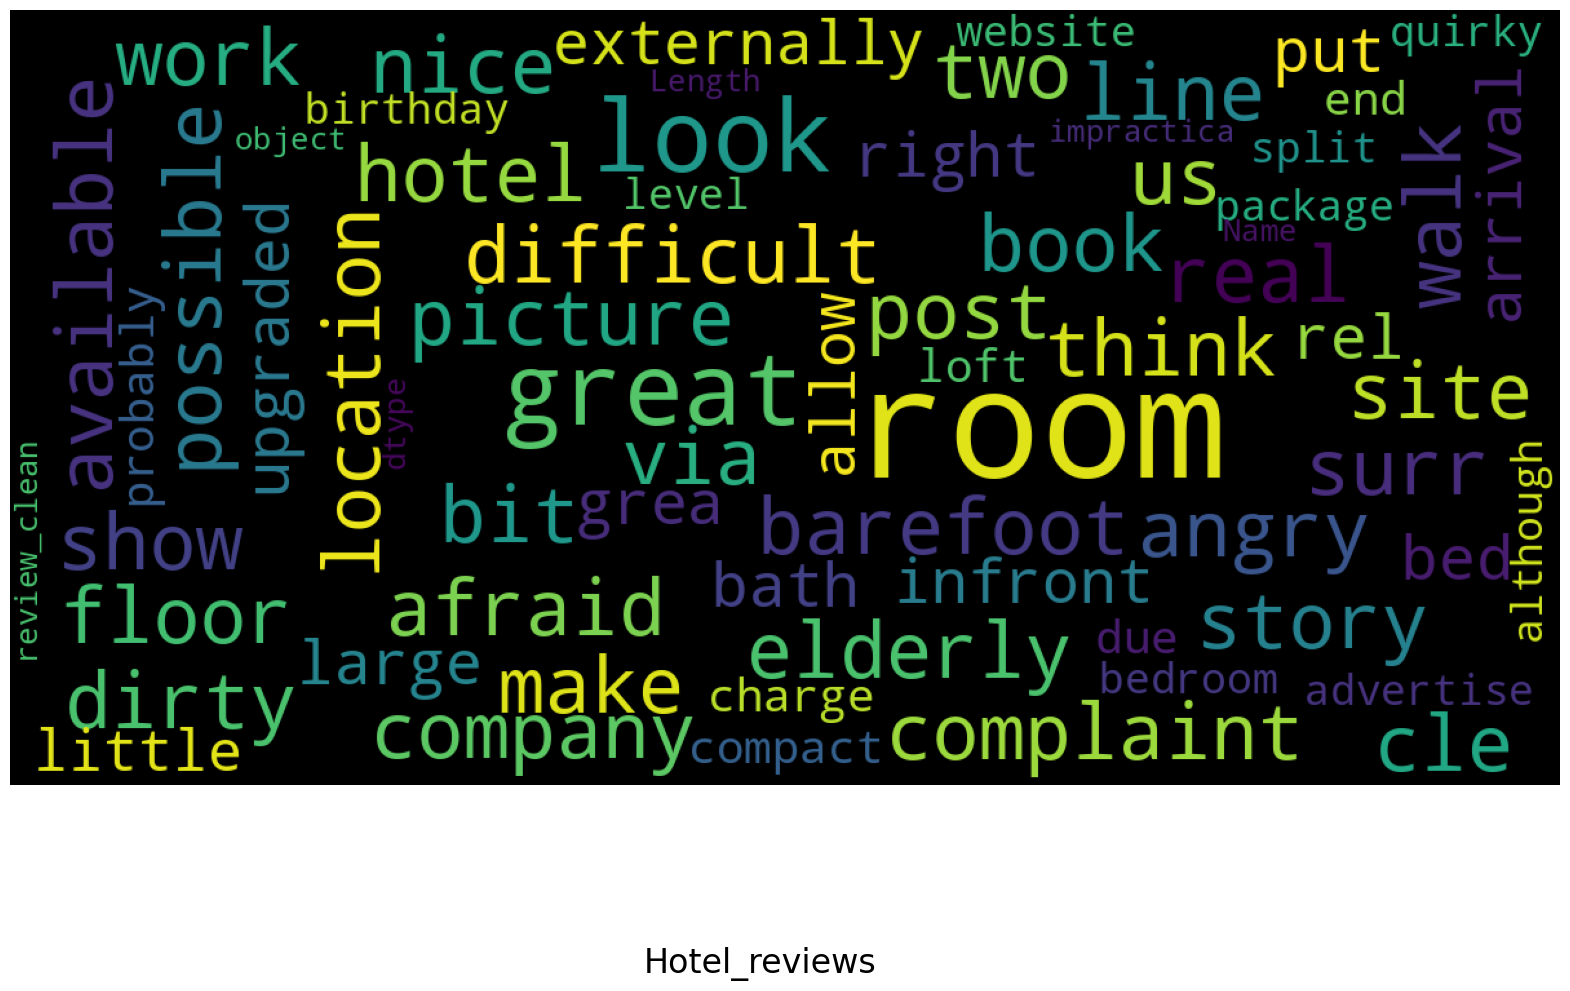

In [30]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = 'Hotel_reviews'):
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 450,
        max_font_size = 40,
        scale = 3,
        random_state = 100
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 24)
        fig.subplots_adjust(top = 2.4)

    plt.imshow(wordcloud)
    plt.show()

# print(wordcloud)
show_wordcloud(reviews_df["review_clean"])

Most of the words are indeed related to the hotels: room, staff, breakfast, etc. Some words are more related to the customer experience with the hotel stay: perfect, loved, expensive, dislike, etc.




In [31]:
# highest positive sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["review", "pos"]].head(10)

,review,pos
79,We have stayed here a few times and always en...,0.563
15,This hotel is awesome I took it sincirely bec...,0.558
59,Basically everything The style of the hotel i...,0.557
7,Apart from the price for the brekfast Everyth...,0.552
64,The bath tub wasn t completely clean that wou...,0.547
53,Beautiful setting in a lovely park room very ...,0.533
55,The hotel is lovely and the staff were amazin...,0.498
95,The work being done externally right now is o...,0.495
78,Hotel was really nice staff were very friendl...,0.490
96,We upgraded to a larger room Had the bath inf...,0.489


The most positive reviews indeed correspond to some good feedbacks.





In [32]:
# lowest negative sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["review", "neg"]].head(10)

,review,neg
44,The service was awful They refused to take ow...,0.371
92,In a terrible state with builders everywhere ...,0.314
21,Our room was an overrated disaster room 231 d...,0.286
63,Very bad attitude of personnel at Breakfast O...,0.237
3,My room was dirty and I was afraid to walk ba...,0.200
43,Water pressure in my shower was no existent F...,0.198
36,not cleaned well lady pushing to pay during m...,0.193
98,Got charged 50 for a birthday package when it...,0.193
49,Service horrible Pillows super stiff and big ...,0.191
72,The sink in the bathroom was very dirty when ...,0.186


Some errors can be found among the most negative reviews: Vader sometimes interpret ‘no’ or ‘nothing’ as negative words whereas they are sometimes used to say that there were no problems with the hotel. Fortunately, most of the reviews are indeed bad ones.

/tmp/ipython-input-4231220472.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['compound'], hist = False, label = label)
/tmp/ipython-input-4231220472.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['compound'], hist = False, label = label)


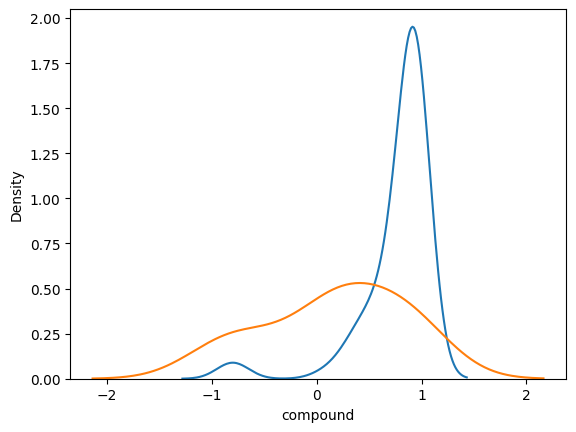

In [33]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = reviews_df[reviews_df['is_bad_review'] == x]

    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

The above graph shows the distribution of the reviews sentiments among good reviews and bad ones. We can see that good reviews are for most of them considered as very positive by Vader. On the contrary, bad reviews tend to have lower compound sentiment scores.

This shows us that previously computed sentiment features will be very important in our modelling part.

### Modelling is_bad_review

In [34]:
# feature selection
label = "is_bad_review"
ignore_cols = [label, "review", "review_clean"]
features = [c for c in reviews_df.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.20, random_state = 42)


We first choose which features we want to use to train our model. Then we split our data into two parts:

* one to train our model
* one to assess its performances

We will next use a Random Forest (RF) classifier for our predictions.

In [35]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(10)

,feature,importance
4,nb_chars,0.092522
5,nb_words,0.084166
2,pos,0.056811
24,word_clean,0.045017
6,word_also,0.040817
3,compound,0.040614
61,word_shower,0.037841
0,neg,0.035254
1,neu,0.028397
43,word_like,0.025810


The most important features are indeed the ones that come from the previous sentiment analysis. The vector representations of the texts also have a lot of importance in our training. Some words appear to have a fairly good importance as well.

In [36]:
rf.predict_proba(X_test)

array([[0.96, 0.04],
       [0.95, 0.05],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.95, 0.05],
       [0.92, 0.08],
       [0.6 , 0.4 ],
       [0.92, 0.08],
       [1.  , 0.  ],
       [0.56, 0.44],
       [0.98, 0.02],
       [0.91, 0.09],
       [0.97, 0.03],
       [0.99, 0.01],
       [0.73, 0.27],
       [0.96, 0.04],
       [0.95, 0.05],
       [0.91, 0.09],
       [0.9 , 0.1 ],
       [0.97, 0.03]])

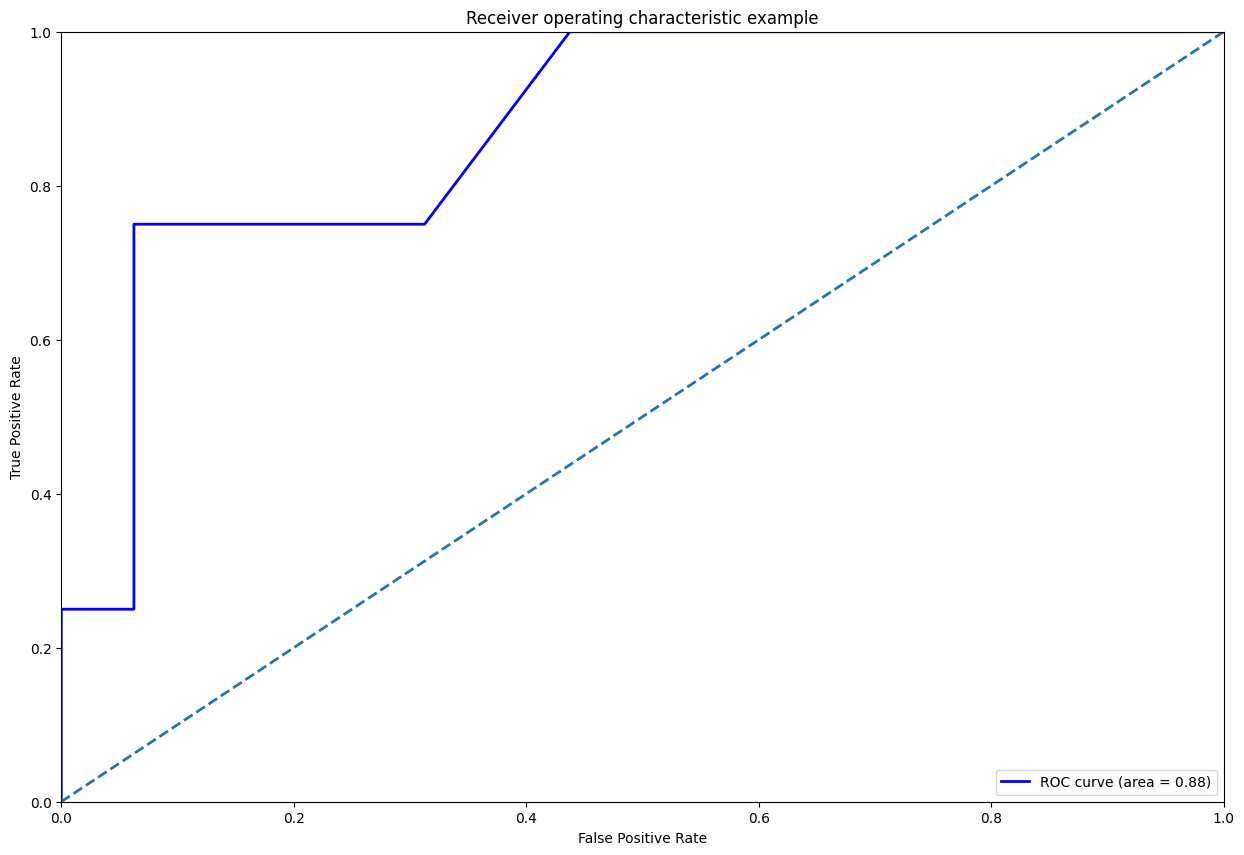

In [37]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='blue',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

The ROC (Receiver Operating Characteristic) curve is usually a good graph to summarize the quality of our classifier. The higher the curve is above the diagonal baseline, the better the predictions. Although the AUC ROC (Area Under the Curve ROC) is very good, we should not use here the ROC curve to assess the quality of our model.

Why? First let us remind the False Positive Rate formula, which corresponds to the x axis of the ROC curve: FPR (False Positive Rate) = # False Positives / # Negatives.

Here the # Negatives corresponds to our number of good reviews which is very high because our dataset is imbalanced. This means that even with some False Positives, our FPR will tend to stay very low. Our model will be able to make a lot of false positives predictions and still have a low false positive rate, while increasing the true positive rate and therefore artificially increasing the AUC ROC metric.

In [39]:
#!pip install funcsigs

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.70')

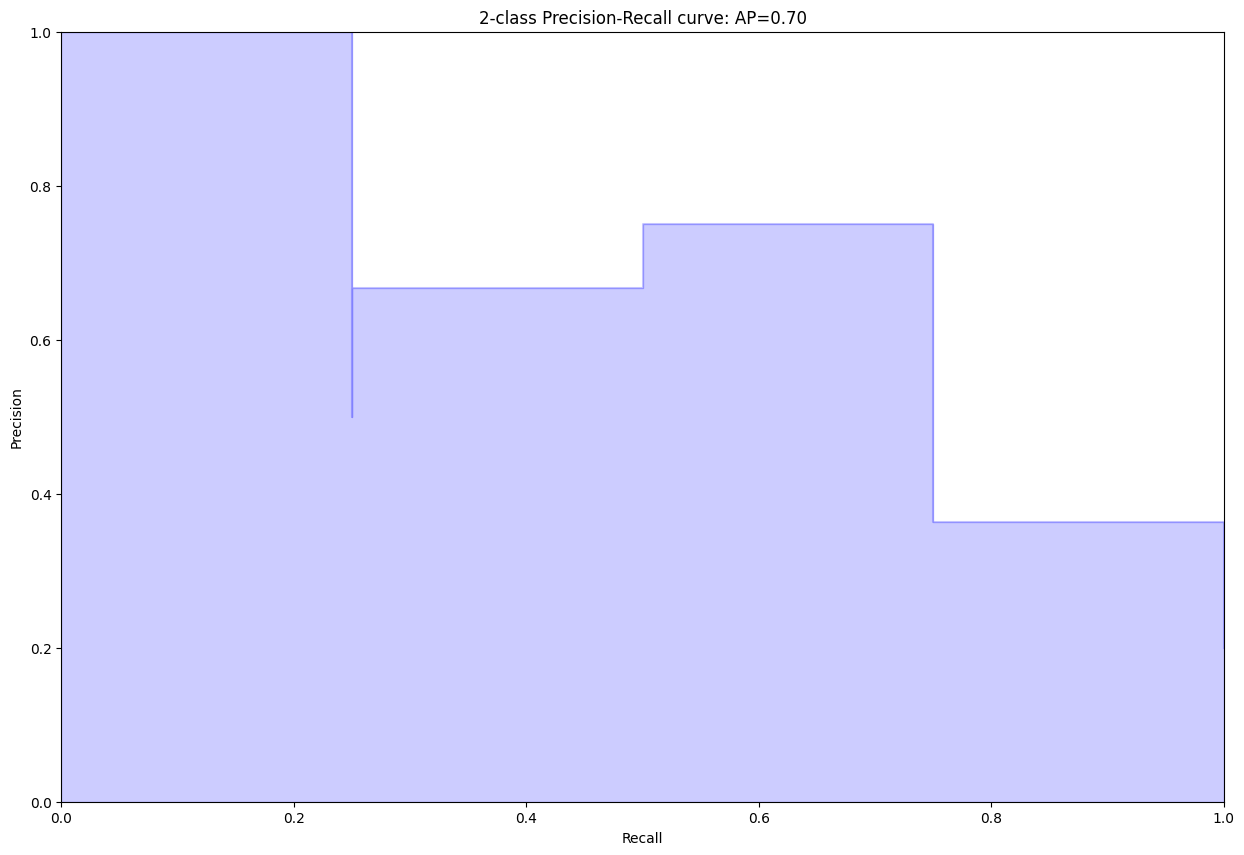

In [40]:
# PR curve

from sklearn.metrics import average_precision_score, precision_recall_curve
from funcsigs import signature

average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

A better metric in this imbalanced situation is the AUC PR (Area Under the Curve Precision Recall), or also called AP (Average Precision).

As recall increases, precision usually drops. So, if we want to catch most positive cases (high recall), we need a low threshold—but that may reduce precision. If we prefer fewer false positives (high precision), we should raise the threshold, accepting lower recall.

To check model quality, we compare it to a baseline—like a random classifier that guesses 1 or 0 half the time. Its AP would be around 0.043 (same as the positive class ratio). Our model's AP is 0.35, which is 8x better—showing strong predictive power.


In [41]:
from sklearn.metrics import accuracy_score

In [42]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
y_pred_test = rf_clf.predict(X_test)
test_accuarcy = accuracy_score(y_test, y_pred_test)
print("Test accuarcy is", test_accuarcy)

Test accuarcy is 0.8


In [44]:
y_pred_train = rf_clf.predict(X_train)
train_accuarcy = accuracy_score(y_train, y_pred_train)
print("Train accuarcy is", train_accuarcy)

Train accuarcy is 1.0


### Train Ada Boost Classifier

In [46]:
from sklearn.ensemble import AdaBoostClassifier

In [47]:
ada_clf = AdaBoostClassifier(random_state=100)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=100)

In [48]:
y_pred_test_ada = ada_clf.predict(X_test)
test_accuarcy_ada = accuracy_score(y_test, y_pred_test_ada)
print("Ada Test accuarcy is", test_accuarcy_ada)

Ada Test accuarcy is 0.8


In [49]:
y_pred_train_ada = ada_clf.predict(X_train)
train_accuarcy_ada = accuracy_score(y_train, y_pred_train_ada)
print("Ada Train accuarcy is", train_accuarcy_ada)

Ada Train accuarcy is 1.0


In [50]:
import pickle
with open('ada_model.pkl', 'wb') as f:
    pickle.dump(ada_clf, f)

In [51]:
import pickle
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_clf, f)

##  Conclusion

It is completely possible to use only raw text as input for making predictions. The most important thing is to be able to extract the relevant features from this raw source of data. This kind of data can often come as a good complementary source in data science projects in order to extract more learning features and increase the predictive power of the models.